# Case Study on Correlation and Regression 

A textile company regularly spent money on five advertising companies for their ads. <br>
1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
2. Build a regression model to predict the profit from the given data and comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

| Add1(in Thousands) | Add2(in Thousands) | Add3(in Thousands)| Add4(in Thousands) | Add5(in Thousands) |
| :-:| :-: | :-: | :-:| :-: |
| 290 | 312 | 309 | 298 | 320 |

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
#adding into df dataframe
df = pd.read_csv('Add_sales_data_2018.csv')

In [182]:
#Inspecting data
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [183]:
df.shape  #finding the dimensions

(205, 7)

In [184]:
df.dtypes   #variable types

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [185]:
# Using describe() to summarize
df.describe()


,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [186]:
#Data Cleansing 
# Find null values if any
df.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

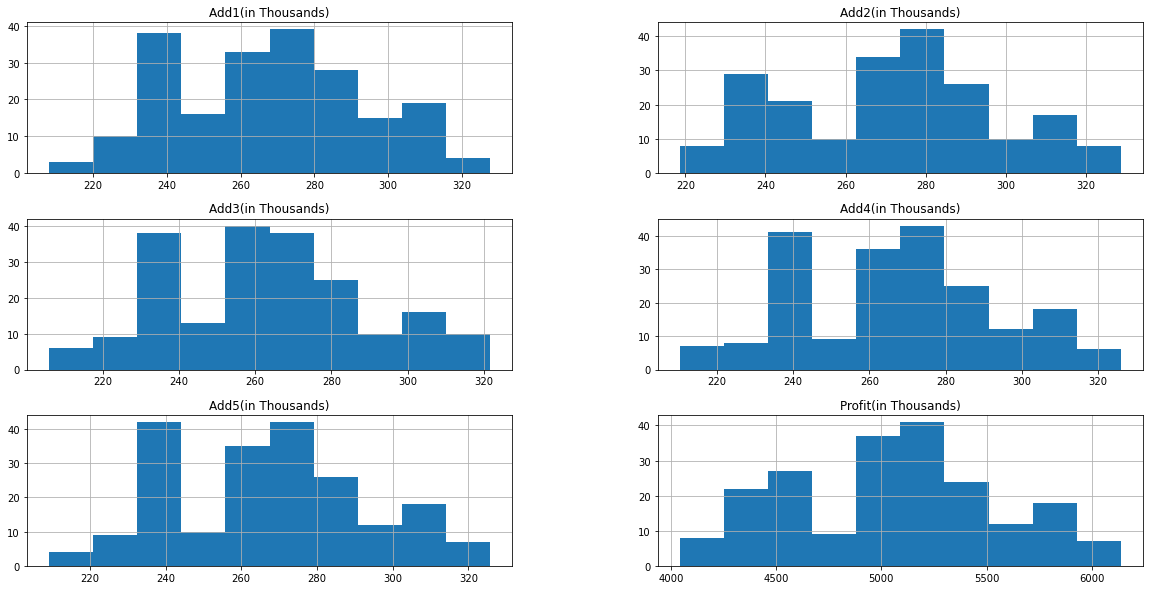

In [187]:
#Plotting the histogram to understand more about variables
df.hist(figsize = (20,10))
plt.show()

All ad columns are continuous numeric.
All ad columns appear to have a normal distribution. 

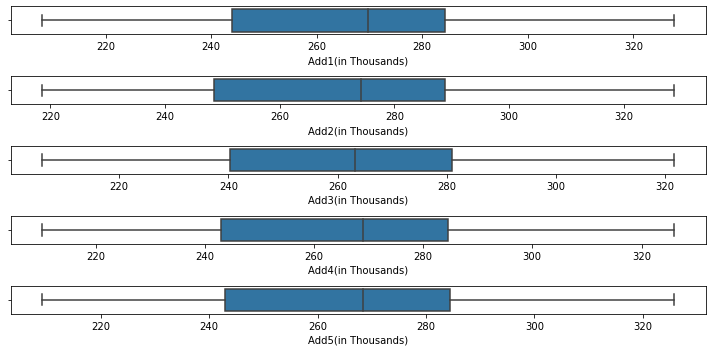

In [188]:
#outlier Analysis
fig,axis = plt.subplots(5,figsize=(10,5))
plt1 = sns.boxplot(x= df['Add1(in Thousands)'],ax=axis[0])
plt1 = sns.boxplot(x= df['Add2(in Thousands)'],ax=axis[1])
plt1 = sns.boxplot(x= df['Add3(in Thousands)'],ax=axis[2])
plt1 = sns.boxplot(x= df['Add4(in Thousands)'],ax=axis[3])
plt1 = sns.boxplot(x= df['Add5(in Thousands)'],ax=axis[4])
plt.tight_layout()

There are no outliers.

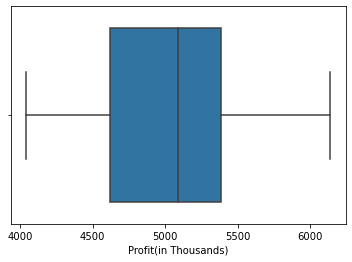

In [189]:
#Univariate analysis - target variable
sns.boxplot(x=df['Profit(in Thousands)'])
plt.show()

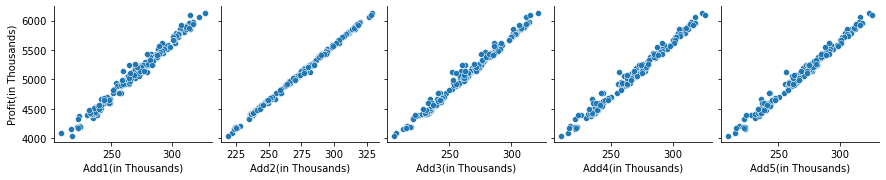

In [190]:
#Checking whether Ad amount spent has any relationship with profit using scatter plot. 
sns.pairplot(df, 
             x_vars=['Add1(in Thousands)', 'Add2(in Thousands)',
                     'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)'],
             y_vars='Profit(in Thousands)'
            )
plt.show()

We see a Linear relationship in all variables , <br>
let us confirm it by generating correlation values using a heat map <br>

<AxesSubplot:>

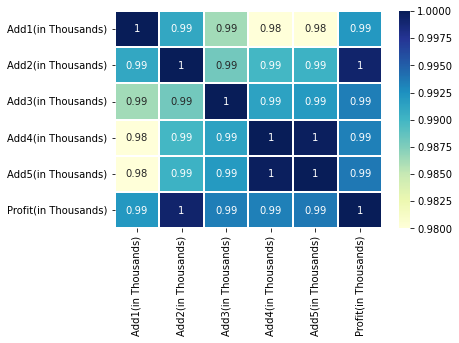

In [191]:
#Check whether there is any relationship between the amount spent for advertising through five different
#companies and profit generated using heatmap. 

sns.heatmap(df.corr(),vmin = 0.98, vmax= 1,annot = True,linewidth =0.2,cmap = 'YlGnBu')

We see a very high correlation between all the 5 independent variables and profit generated.(multicolinearity)<br>

We can drop either add4 or add5 as both have an equal coff value of 0.99 related to the dependent variable profit.<br>

However, choosing not to drop any columns as there are very few features and the problem statement requires all 5 columns. 


In [215]:
#Building a regression model#building linear regression model using 'Add1(in Thousands)','Add2(in Thousands)'
#,'Add3(in Thousands)',Add4(in Thousands)', Add5(in Thousands)' as features 
y = df['Profit(in Thousands)']
X= df.drop(['Profit(in Thousands)','Date'],axis=1)


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

from sklearn import linear_model

lr = linear_model.LinearRegression() #We are creating an instance of the model and storing to variable lr

model = lr.fit(X_train,y_train) #fitting the instance created to our training data

predictions = model.predict(X_test) #predicting output for x test


In [216]:
#Mean Square error value
from sklearn.metrics import mean_squared_error,r2_score
print('MSE: ',mean_squared_error(y_test,predictions))

MSE:  8.11273293080854e-25


Model accuracy will be very high due to very low MSE value. 

In [217]:
pd.DataFrame({'Actual': pd.DataFrame(y_test).values.reshape(-1),
              'Predicted value': pd.DataFrame(predictions).values.reshape(-1)}).head()

,Actual,Predicted value
0,4152.066,4152.066
1,4446.441,4446.441
2,5131.898,5131.898
3,4907.560,4907.560
4,5004.282,5004.282


Text(0, 0.5, 'Predicted')

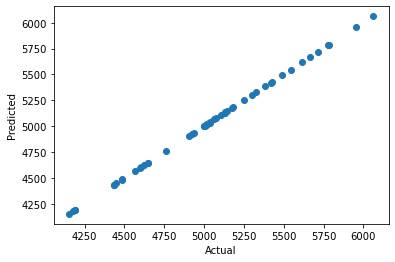

In [224]:
#Visualizing the fit on predicted data
plt.scatter(y_test,predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')

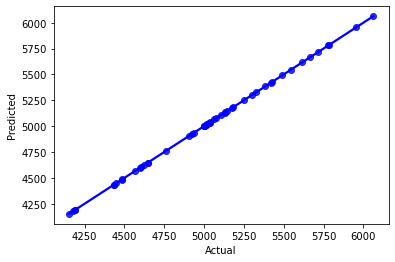

In [221]:
#Regression plot of our model.
#A regression plot is useful to understand the linear relationship between two parameters. 
#It creates a regression line in-between those parameters and then plots a scatter plot of those data points.

sns.regplot(x=y_test,y=predictions,ci=None,color ='Blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [219]:
Train_r_sq = model.score(X_train,y_train)
print('coefficient of determination for training data:', Test_r_sq)

Test_r_sq = model.score(X_test,y_test)
print('coefficient of determination for test data:', Test_r_sq)
#Accuracy 
Accuracy=r2_score(y_test,predictions)*100
print('Accuracy: ',Accuracy)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination for training data: 1.0
coefficient of determination for test data: 1.0
Accuracy:  100.0
intercept: 0.0
slope: [ 1.   12.38  3.5   1.    0.9 ]


# Linear equation will be as follows:

- profit = 0 + 1add1 + 12.38add2 + 3.5add3 + 1add4 + 0.9add5

3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

| Add1(in Thousands) | Add2(in Thousands) | Add3(in Thousands)| Add4(in Thousands) | Add5(in Thousands) |
| :-| :- | :- | :- | :- |
| 290 | 312 | 309 | 298 | 320 |




In [222]:
add1 = 290
add2 = 312
add3 = 309
add4 = 298
add5 = 320

predict_profit = 0 + 1*add1 + 12.38*add2 + 3.5*add3 + 1*add4 + 0.9*add5
print('Predicted Profit = ', predict_profit)


Predicted Profit =  5820.06


In [223]:
#The above can also be done using predict() from sklearn

ad_spend = np.array([290,312,309,298,320]).reshape(1, -1) 
model.predict(ad_spend)

array([5820.06])